In [1]:
import sys
sys.path.append('..')

In [2]:
from os import listdir

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from utils import thinkstats2, thinkplot

In [3]:
# Getting all data in the data directory
data = {}
files = listdir("./data")
for f in files:
    data[f.split(".")[0]] = pd.read_csv("./data/" + f)

/home/ihsan/.virtualenvs/eda-hw/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Section 1

#### Questions
- Does height of a player affect points a player scored?
- **Does weight of a player affect three point scores?**
- Does age of a player affect his blocking ability?

The answer to first and third questions are most probably yes. So, the second question is selected since it is more interesting to answer.

#### Hypothesis
H0: Weight has no effect on three point scores. H1: Weight has effect on three point scores.

In [4]:
# Printing all features in the data sets
for key in data:
    print("{}:".format(key))
    print(data[key].columns.values)
    print("\n")

basketball_awards_coaches:
['year' 'coachID' 'award' 'lgID' 'note']


basketball_hof:
['year' 'hofID' 'name' 'category']


basketball_abbrev:
['abbrev_type' 'code' 'full_name']


basketball_series_post:
['year' 'round' 'series' 'tmIDWinner' 'lgIDWinner' 'tmIDLoser' 'lgIDLoser'
 'W' 'L']


basketball_master:
['bioID' 'useFirst' 'firstName' 'middleName' 'lastName' 'nameGiven'
 'fullGivenName' 'nameSuffix' 'nameNick' 'pos' 'firstseason' 'lastseason'
 'height' 'weight' 'college' 'collegeOther' 'birthDate' 'birthCity'
 'birthState' 'birthCountry' 'highSchool' 'hsCity' 'hsState' 'hsCountry'
 'deathDate' 'race']


basketball_coaches:
['coachID' 'year' 'tmID' 'lgID' 'stint' 'won' 'lost' 'post_wins'
 'post_losses']


basketball_player_allstar:
['player_id' 'last_name' 'first_name' 'season_id' 'conference' 'league_id'
 'games_played' 'minutes' 'points' 'o_rebounds' 'd_rebounds' 'rebounds'
 'assists' 'steals' 'blocks' 'turnovers' 'personal_fouls' 'fg_attempted'
 'fg_made' 'ft_attempted' 'ft_made'

## Section 2

By looking at features above, we can spot that we need `weight` values in `basketball_master` data set for player's weight and `threeMade` values in `basketball_players` data set for three point scores. In addition, we can also use `threeAttempted` values in `basketball_players` to check proportion of successful tries.


In [5]:
data['basketball_master'].head(3)

,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,bioID,bioID,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,0000-00-00,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,0000-00-00,r
1,abdelal01,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,F-C,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
2,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",C,...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B


In [6]:
# Removing first row with column names
data['basketball_master'] = data['basketball_master'][1:]

In [7]:
data['basketball_players'].head(3)

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [8]:
# Merging dataset based on player ids
data['basketball_master'].rename(index=str, columns={"bioID": "playerID"}, inplace=True)
combined = data['basketball_players'].merge(data['basketball_master'], on='playerID', how='left')
combined = combined.loc[:, ["playerID", "year", "weight", "threeMade", "threeAttempted"]]
combined.head(3)

,playerID,year,weight,threeMade,threeAttempted
0,abramjo01,1946,195.0,0,0
1,aubucch01,1946,137.0,0,0
2,bakerno01,1946,180.0,0,0


In [9]:
# Checking nan values
combined.isna().any()

playerID          False
year              False
weight             True
threeMade         False
threeAttempted    False
dtype: bool

In [10]:
# Dropping nan rows
combined.dropna(inplace=True)
combined.isna().values.any()

False

In [11]:
# Getting success proportion of threes made
combined['threeMade/Attempted'] = combined['threeMade'] / combined['threeAttempted']

In [12]:
# Filling na values caused due to dividing by 0
combined['threeMade/Attempted'].fillna(0, inplace=True)

In [13]:
# Checking if proportion of threeMade and threeAttempted more than 1
combined[combined["threeMade/Attempted"] > 1]

,playerID,year,weight,threeMade,threeAttempted,threeMade/Attempted
19295,conlemi01,2007,175.0,91,90,1.011111
19828,conlemi01,2008,175.0,217,161,1.347826


In [14]:
# Fixing wrongly entered data
combined.loc[combined["threeMade/Attempted"] > 1, "threeAttempted"] = combined['threeMade']
combined.loc[combined["threeMade/Attempted"] > 1, "threeMade/Attempted"] = 1

In [15]:
len(combined[combined["threeMade/Attempted"] > 1])

0

In [16]:
# Checking number of players having 100% success
proportion_1 = combined[combined["threeMade/Attempted"] == 1]

print(len(proportion_1[combined["threeMade"] > 3]))
print(len(proportion_1[combined["threeMade"] <= 3]))

2
162


/home/ihsan/.virtualenvs/eda-hw/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/ihsan/.virtualenvs/eda-hw/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


## Section 3

In [17]:
combined['weight'].min()

0.0

In [18]:
# Droping players with 0 weight value
combined.drop(combined[combined['weight'] == 0].index, inplace=True)

In [19]:
combined['weight'].min()

114.0

In [20]:
combined.describe()

,year,weight,threeMade,threeAttempted,threeMade/Attempted
count,23632.000000,23632.00000,23632.000000,23632.00000,23632.000000
mean,1983.117299,207.43915,12.641842,36.61019,0.130485
std,19.836459,25.48121,30.172866,80.95646,0.179936
min,1937.000000,114.00000,0.000000,0.00000,0.000000
25%,1970.000000,189.00000,0.000000,0.00000,0.000000
50%,1987.000000,208.00000,0.000000,1.00000,0.000000
75%,2000.000000,225.00000,6.000000,24.00000,0.290840
max,2011.000000,330.00000,269.000000,678.00000,1.000000


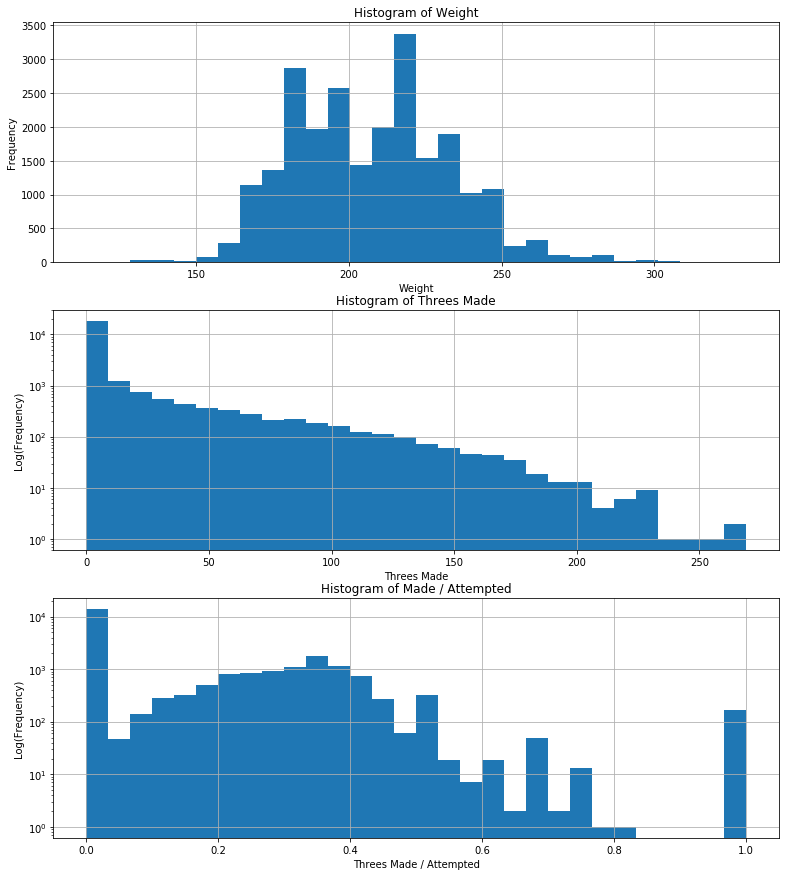

In [21]:
# Histogram plots
plt.figure(figsize=(13,15))

plt.subplot(311)
combined['weight'].hist(bins=30)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')

plt.subplot(312)
combined['threeMade'].hist(bins=30, log=True)
plt.xlabel('Threes Made')
plt.ylabel('Log(Frequency)')
plt.title('Histogram of Threes Made')

plt.subplot(313)
combined['threeMade/Attempted'].hist(bins=30, log=True)
plt.xlabel('Threes Made / Attempted')
plt.ylabel('Log(Frequency)')
plt.title('Histogram of Made / Attempted')

plt.show()

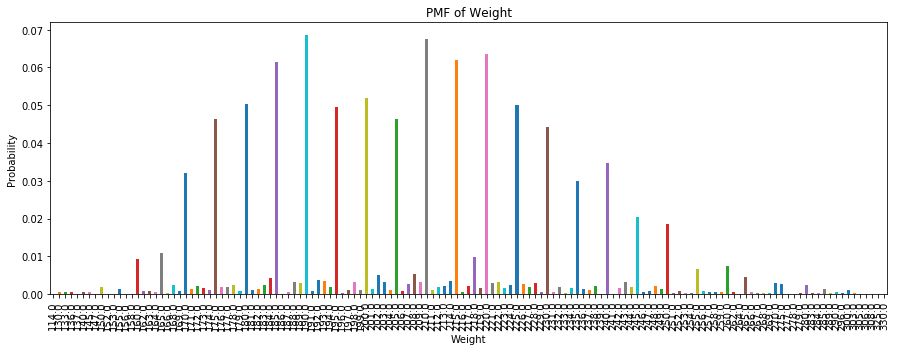

In [22]:
# PMF plot
plt.figure(figsize=(15, 5))

# Getting pmf
pmf = combined['weight'].value_counts().sort_index() / len(combined)
pmf.plot(kind="bar")
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.title('PMF of Weight')

plt.show()

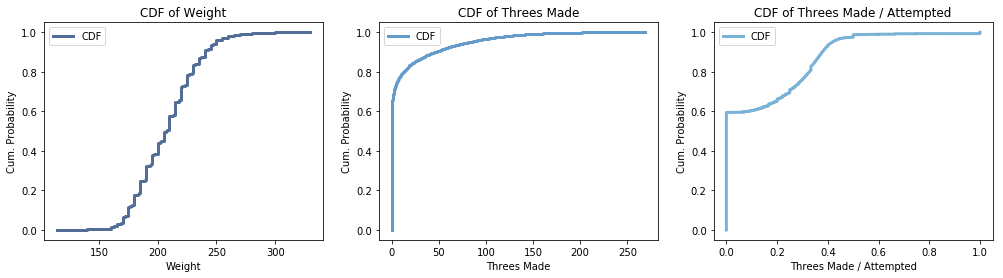

In [23]:
# CDF plots
plt.figure(figsize=(17,4))

plt.subplot(131)
cdf = thinkstats2.Cdf(combined['weight'], label="CDF")
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Weight', ylabel='Cum. Probability', title='CDF of Weight')

plt.subplot(132)
cdf = thinkstats2.Cdf(combined['threeMade'], label="CDF")
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Threes Made', ylabel='Cum. Probability', title='CDF of Threes Made')

plt.subplot(133)
cdf = thinkstats2.Cdf(combined['threeMade/Attempted'], label="CDF")
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Threes Made / Attempted', ylabel='Cum. Probability', title='CDF of Threes Made / Attempted')

plt.show()

## Section 4

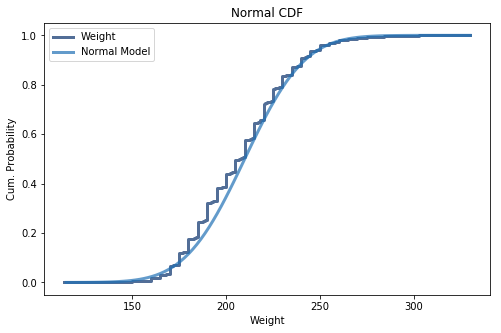

In [24]:
# Normal distribution fit to weight distribution
plt.figure(figsize=(8,5))

cdf = thinkstats2.Cdf(combined['weight'], label="Weight")
thinkplot.Cdf(cdf)

# Creating a normal distribution
x, y = thinkstats2.RenderNormalCdf(210, 25, 115, 330, 100)
thinkplot.Plot(x, y, label="Normal Model")

thinkplot.Config(title='Normal CDF', xlabel='Weight', ylabel='Cum. Probability')

/home/ihsan/.virtualenvs/eda-hw/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


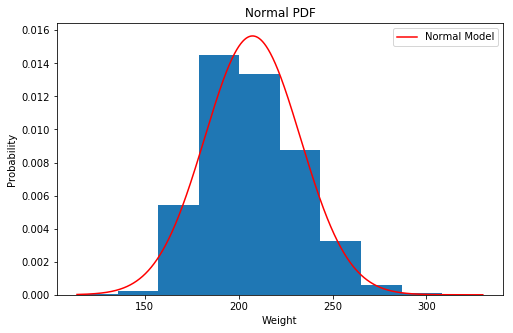

In [25]:
# Normal distribution fit to weight distribution with PDF
plt.figure(figsize=(8,5))

params = sp.stats.norm.fit(combined['weight'])
x = np.linspace(114, 330, 100)
fitted_pdf = sp.stats.norm.pdf(x, params[0], params[1])

plt.plot(x, fitted_pdf,"red",label="Normal Model")
plt.hist(combined['weight'], normed=1)
plt.title("Normal PDF")
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.legend()

plt.show()

## Section 5

In [26]:
spearman = sp.stats.spearmanr
pearson = sp.stats.pearsonr

In [27]:
spearman(combined['weight'], combined['threeMade'])[0]

-0.153502472387177

In [28]:
pearson(combined['weight'], combined['threeMade'])[0]

-0.10647002406915476

In [29]:
spearman(combined['weight'], combined['threeMade/Attempted'])[0]

-0.1256189806232003

In [30]:
pearson(combined['weight'], combined['threeMade/Attempted'])[0]

-0.10596705015488316

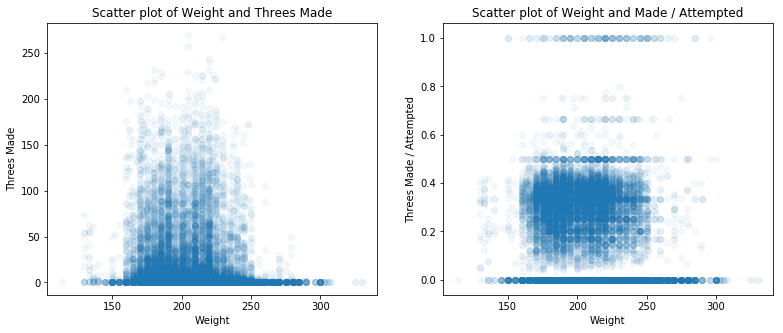

In [31]:
# Scatter plots
plt.figure(figsize=(13,5))

plt.subplot(121)
plt.scatter(combined['weight'], combined['threeMade'], alpha=0.05)
plt.xlabel('Weight')
plt.ylabel('Threes Made')
plt.title('Scatter plot of Weight and Threes Made')

plt.subplot(122)
plt.scatter(combined['weight'], combined['threeMade/Attempted'], alpha=0.05)
plt.xlabel('Weight')
plt.ylabel('Threes Made / Attempted')
plt.title('Scatter plot of Weight and Made / Attempted')

plt.show()

In [32]:
def plot_percentiles(data, x, y, start, stop):
    """
    Plots percentiles with respect to another variable
    """
    colors = ["yellow","orange","red"]
    percentages = [25, 50, 75]
    
    data = data.dropna(subset=[x, y])
    bins = np.arange(start, stop)
    indices = np.digitize(data[x], bins)
    groups = data.groupby(indices)
    
    x_ax = [group[x].mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group[y]) for i, group in groups]
    
    for color, percentage in zip(colors, percentages):
        y_ax = [cdf.Percentile(percentage) for cdf in cdfs]
        label = "{}th".format(percentage)
        thinkplot.Plot(x_ax, y_ax, label=label, color=color)

    thinkplot.Config(xlabel=x, ylabel=y)

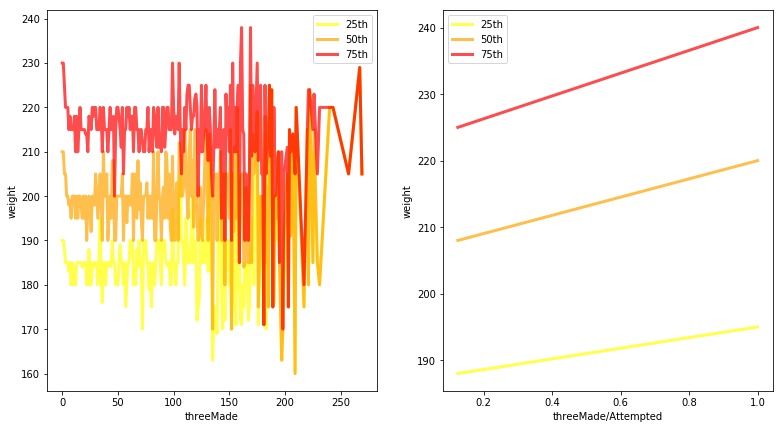

In [33]:
plt.figure(figsize=(13, 7))

plt.subplot(121)
plot_percentiles(combined, "threeMade", "weight", 0, 330)

plt.subplot(122)
plot_percentiles(combined, "threeMade/Attempted", "weight", 0, 269)

## Section 6

In [34]:
class HypothesisTest(object):
    """
    General hypothesis test class
    """

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / float(iters)

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()
        

class CorrelationPermute(HypothesisTest):
    """
    Hypothesis test class for correletion with permutation using pearson's score
    """

    def TestStatistic(self, data):
        xs, ys = data
        return abs(pearson(xs, ys)[0])

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
class SpearmanCorrelationPermute(CorrelationPermute):
    """
    Hypothesis test class for correletion with permutation using spearman's score
    """

    def TestStatistic(self, data):
        xs, ys = data
        return abs(spearman(xs, ys)[0])

In [35]:
data = combined['weight'].values, combined['threeMade'].values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [36]:
ht2 = SpearmanCorrelationPermute(data)
pvalue = ht2.PValue()
pvalue

0.0

In [37]:
data = combined['weight'].values, combined['threeMade/Attempted'].values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [38]:
ht2 = SpearmanCorrelationPermute(data)
pvalue = ht2.PValue()
pvalue

0.0